In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special
from scipy.special import factorial, hermite

## Исходные функции

#### Мода Гаусса-Эрмита

In [2]:
def mode_hermite_gaussian(x, radius, n):
    return np.exp(-(x ** 2) / (2 * radius ** 2)) * hermite(n)(x / radius)

#### Ядро функции

In [3]:
def kernel(u, x, a, k, alpha):
    return np.exp(
        (1j * k)
        / (2 * a * np.sin(alpha))
        * (x ** 2 * np.cos(alpha) - 2 * x * u + u ** 2 * np.cos(alpha))
    )

## Вычисление функций на интервале

#### Параметры результатов моделирования

In [4]:
lambdav = 0.000001

a = 25 * lambdav
d = 24 * lambdav
alpha = np.pi / 5
k = 2 * np.pi / lambdav

#### Параметры интегрирования f(x) * ker(u, x)

In [5]:
s_a = -d / 2
s_b = +d / 2
n = 100

#### Параметры вида функции на отрезке [s_p, s_q]

In [6]:
s_p = 0
s_q = np.pi * a / 2
m = 100

#### Входной сигнал в матричном виде

In [7]:
x = np.arange(s_a, s_b, step=(s_b - s_a) / n)
matrix_f = mode_hermite_gaussian(x, radius=d * 0.68, n=4)

#### Матрица A

In [8]:
u_l, x_k = np.mgrid[
    s_p : s_q : (s_q - s_p) / m, s_a : s_b : (s_b - s_a) / n
]

matrix_A = kernel(u=u_l, x=x_k, a=a, k=k, alpha=alpha)

#### Результат умножения

In [9]:
matrix_F = matrix_A.dot(matrix_f) * (s_b - s_a) / n
matrix_F = np.sqrt(k / (2 * np.pi * 1j * a * np.sin(alpha))) * matrix_F

## Графики

In [10]:
def plot(x, label):
    plt.plot(x, label=label)
    plt.legend()
    plt.grid()
    plt.show()

#### Амплитуда исходного сигнала

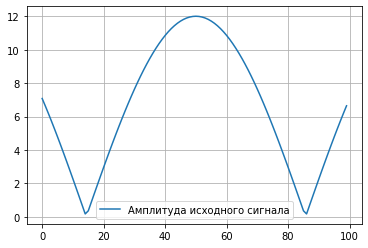

In [11]:
amplitude_f = np.absolute(matrix_f)

plot(amplitude_f, "Амплитуда исходного сигнала")

#### Фаза исходного сигнала

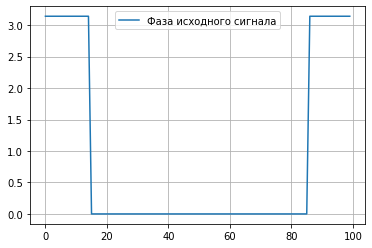

In [12]:
phase_f = np.angle(matrix_f)

plot(phase_f, "Фаза исходного сигнала")

#### Амплитуда преобразования

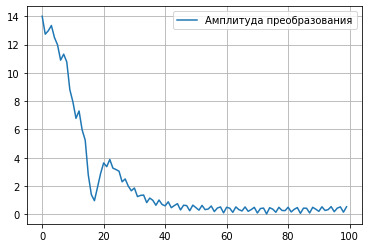

In [13]:
amplitude_F = np.absolute(matrix_F)

plot(amplitude_F, "Амплитуда преобразования")

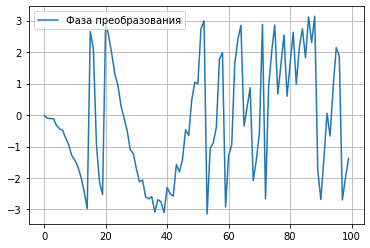

In [14]:
phase_F = np.angle(matrix_F)

plot(phase_F, "Фаза преобразования")